In [2]:
# importing important libaries 

import pandas as pd
import numpy as np

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# warning
import warnings
warnings.filterwarnings('ignore')

# Preprocessing and Normalization
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import f1_score


In [3]:
# reading the data set
df = pd.read_csv(r'C:\Users\DELL\Documents\avocado.csv\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# chceking the dimension
df.shape

(18249, 14)

In [5]:
#checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Column Unnamed: 0 is like index column, which do not contribute anything in our ML model. We will drop it. 

Some relevant columns in the dataset:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold

Here, we need divide this into two category, One in which our label will be 'region', for that we need to built a classification model.


Second category will be when our target variable will be 'AveragePrice', and this will be our regression model, where we need to predict the AveragePrice of the avocado.




In [6]:
# checking null
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We don't see any null values or missing data here, so it is safe to proceed.

In [7]:
# statistical description of data
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
# check the values of XLarge Bags
df['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [9]:
#checking unique value of region
len(df['region'].unique())

54

In [10]:
#checking unique value of year
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [11]:
df  #checking the entire data 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [12]:
# dropping Unnamed: 0 column
df=df.drop('Unnamed: 0', axis=1)
df.shape

(18249, 13)

# EDA

From our data set we can see that we have two categorical column, first is 'type' and second one is 'region'.
We do have a year column which defines the year of the data and a date column which give us the date, I don't think date will contribute to my ML model as we already get year of observation. So we can drop 'date' column.

Going forward for analysis purpose I will pick 'year' as one of the category on the basis of which we will explore our data, second thing is 'type' which interest me more cause now a days people pick organic over conventional, so it will  be interesting to see how our data label is related with it.


Thirdly we can observe total volume and total bags as separate category to explore our data. 

As it has already mentioned that we need to do two separate prediction one for label 'AveragePrice' and other for label 'region'. So during analysis we will keep this in mind. We will also check if 'AveragePrice' and 'region' is correlated or not. If yes, then at what degree.


So let's begin with our exploratary work, before that let's drop column 'date' from our dataset. 


In [13]:
# dropping column date from data set.
df=df.drop('Date', axis=1)
df.shape

(18249, 12)

In [14]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

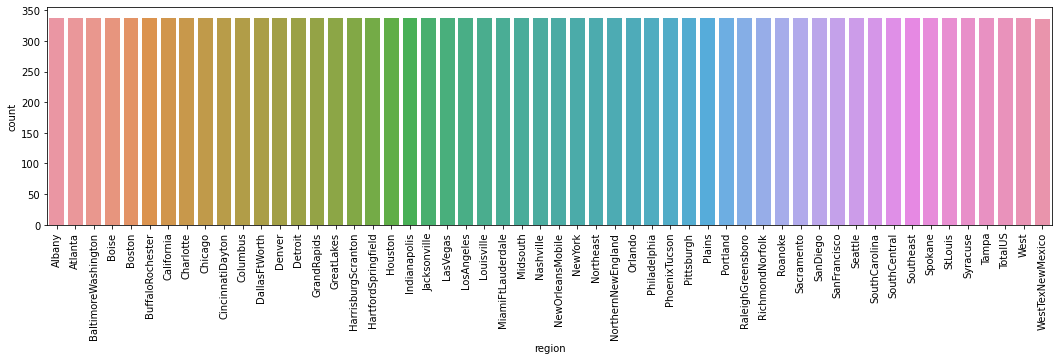

In [15]:
#let's visualise it using count plot
plt.figure(figsize=(18,4))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

We can see that data is equally distributed among every city. And there is roughly around 54 cities. 

<AxesSubplot:xlabel='year', ylabel='count'>

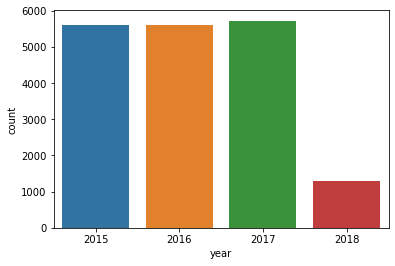

In [16]:
# Let's see how is data distributed over the years.
sns.countplot(df['year'])

We can observe that we have four years of data in our data set, starting from 2015 to 2018. The count of observation for 2018 is less as compared to remaining years.

<AxesSubplot:xlabel='type', ylabel='count'>

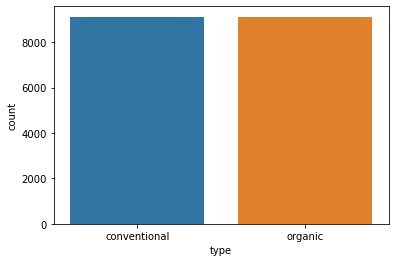

In [17]:
# Let's see how type is distributed
sns.countplot(df['type'])

It's interesting to see that we have equal number of observations for both 'conventional' and 'organic'. The data is equally distributed between each class.

<Figure size 1296x288 with 0 Axes>

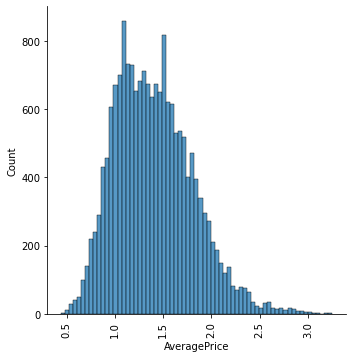

In [18]:
# Let's check the distribution for 'AveragePrice'
plt.figure(figsize=(18,4))
sns.displot(df['AveragePrice'])
plt.xticks(rotation=90)
plt.show()


We can observe the range for Averange price lies between anywhere around 0.5 to 3.0 excluding some outliers. And majority of the sales price lies between 1-1.8. So we can say that between .75-1.85 approx you can find an avocado in the market, stores etc.

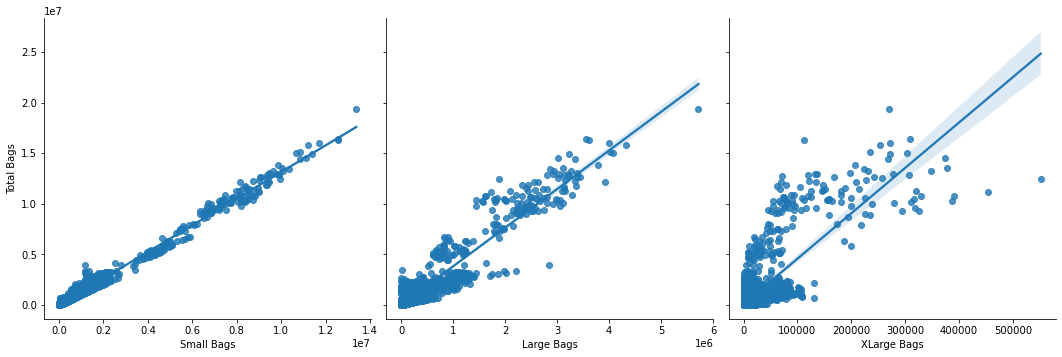

In [19]:
#Multivariant analysis

# Let's see how Totalbags vs small bags, Large bags and XLarge bags are connected.

sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')


We can see that the three(Small Bags, Large Bags, XLarge bags) are correlated with Total bags. Infact Total Bags is sum total of individual field for particular row.

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

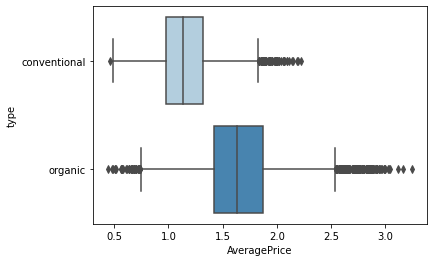

In [20]:
# type of avocado vs averageprice
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'Blues')

We can see That the Average Price for Organic avocado is higher than the Average Price of conventional type. 

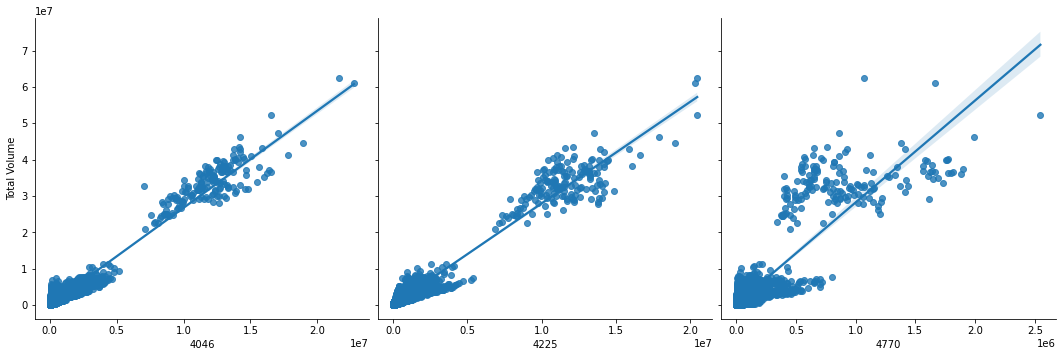

In [21]:
#Total Volume vs 4046, 4225, 4770 avocado

sns.pairplot(df, x_vars=['4046', '4225', '4770'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

Here also we can see that  '4046', '4225', '4770' is highly correlated to Total Volume. It might be possible that row wise sum of individual field is equal to Total Volume. As This number denotes the total sale of avocado with IPU 4046,4225 & 4770 respectively.

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

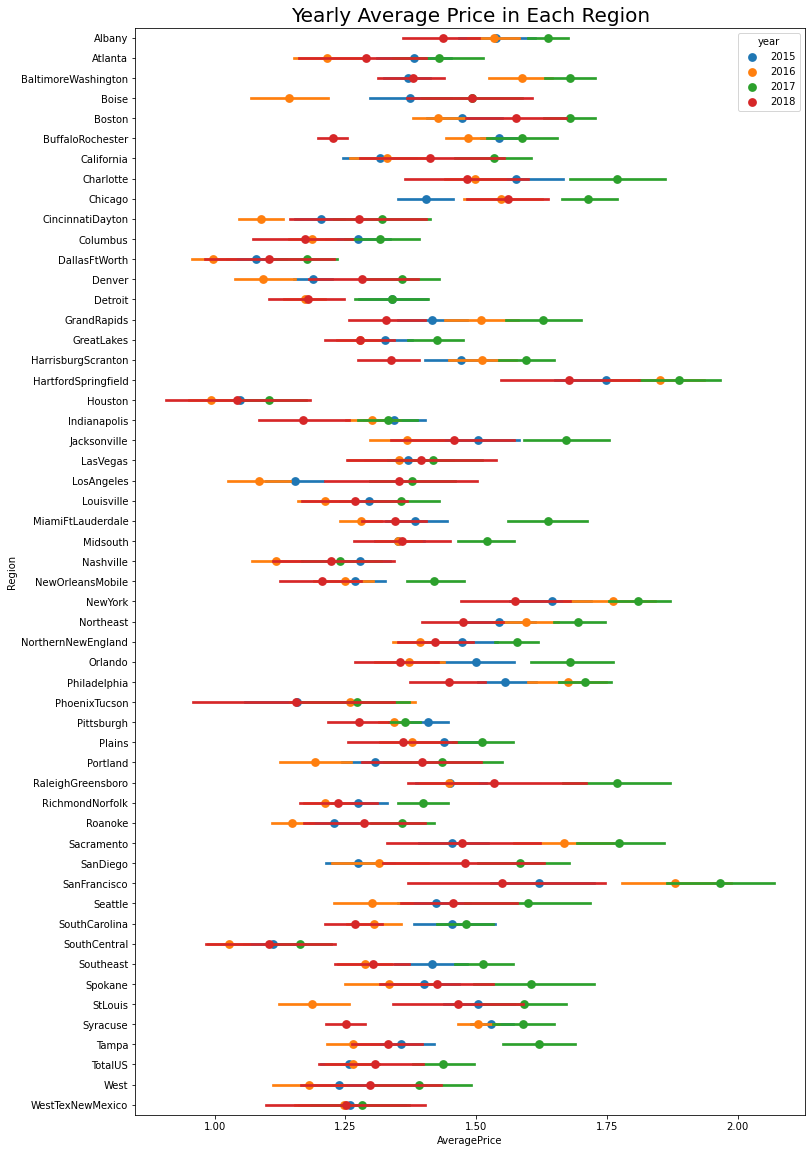

In [22]:
# Let's see how average price is correlated to region over the years.

plt.figure(figsize=(12,20))
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('AveragePrice')
plt.ylabel('Region')
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

We can observe that in most of the cities the average price of avocado in the year 2017 is higher then rest of the years. While the average price of avocado for 2018 is comparatively on the lower in most of the cities. SanFrancisco registered highest average price of avocado while Houston registered lowest average price for avocado. HartFordSpringField has all time high values for average price. 

Text(0.5, 1.0, 'Types of avocado Average Price in Each Region')

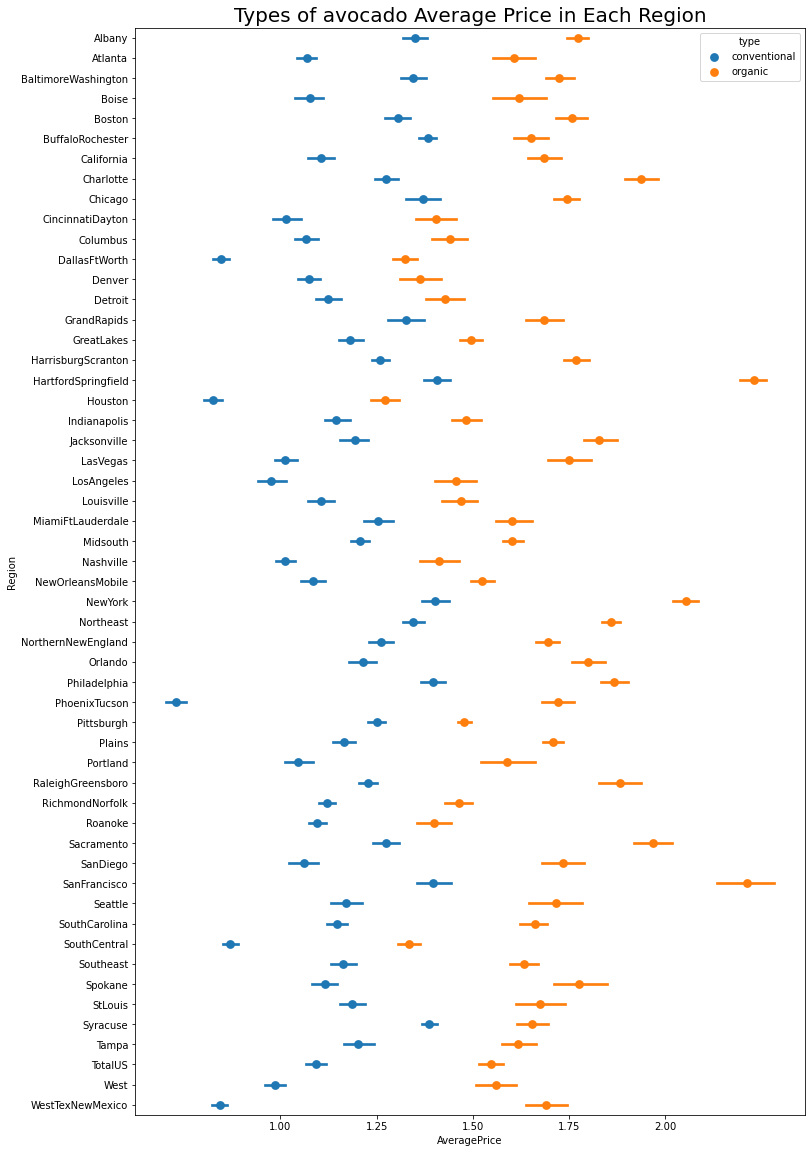

In [23]:
# let's see how Average Price is related to Region over type of avocado
plt.figure(figsize=(12,20))
sns.pointplot(x='AveragePrice',y='region',data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('AveragePrice')
plt.ylabel('Region')
plt.title("Types of avocado Average Price in Each Region",{'fontsize':20})

Here as well we observe that the average price of Conventional type is lower then that of organic Avocado. Also 'SanFrancisco' and 'HartfortSpringfield' shows higher average prices of Avocado. While PhenioxTucson has lowest Average price for conventional avocado's  and Houston and SouthCentral shows overall lower AveragePrice of avocado's

By this one thing is certain the Average Price of Avocado depends on region, and type alot. 

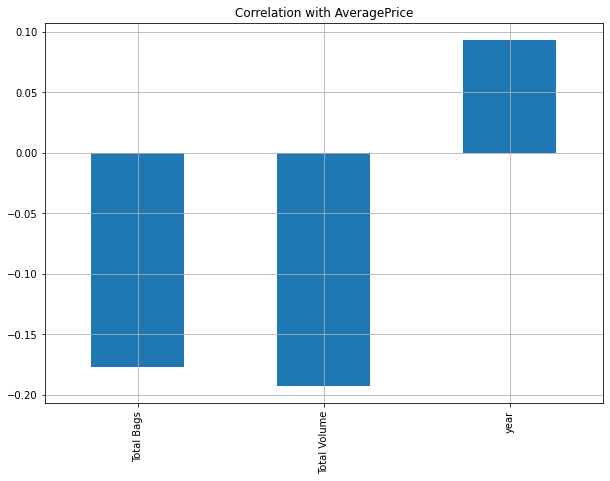

In [24]:
# Let's see how total bags, total volume  and yearare connected to average price, for this we can use corr with function
features= ['Total Bags','Total Volume', 'year']
df[features].corrwith(df.AveragePrice).plot(kind='bar', grid= True, figsize=(10,7),
                                                  title="Correlation with AveragePrice")

plt.show()

We can observe that Total volume is highly correlated with Average price and year is comparatively least correlated feature. Let's draw a correlation matrix of all continuous data to so there correlation with each other and average price.

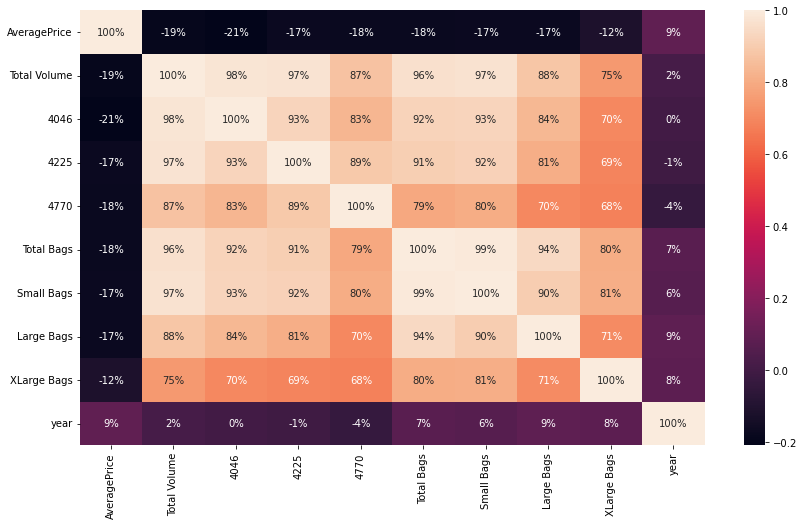

In [26]:
# let's visulaize the correlation matrix , using Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()

Seeing this it is confirm that our independent variable are highly correlated, which we already observe in the above analysis. We can even observe huge correlation between total volumes and total bags. Let's Do one thing we will drop Total Volume and Total Bags column, as anyways these data can be summary of other columns.

In [27]:
# Dropping 'TotalVolume' and "Total Bags" columns.
df=df.drop(columns=['Total Bags','Total Volume'], axis=1)
df.shape

(18249, 10)

So far data looks good. Let's move ahead encode our categorical column, so that we can do futher analysis. 

# Encoding

In [28]:
# we will use Label Encoder to encode our two categorical Columns
#coverting categorical data to numerical form.

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df['type'] = lab_enc.fit_transform(df['type'])
df['region'] = lab_enc.fit_transform(df['region'])

In [29]:
#let's see how our data looks.
df.head(5)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


Data looks good, let's check the correlation of the data using correlation matrix .

In [30]:
# correlation matrix

corr=df.corr()
corr

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.208317,-0.172928,-0.179446,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
4046,-0.208317,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Small Bags,-0.174730,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.225819,-0.232289,-0.210027,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280
year,0.093197,0.003353,-0.009559,-0.036531,0.063915,0.087891,0.081033,-0.000032,1.000000,-0.000055
region,-0.011716,0.192073,0.145726,0.095252,0.164702,0.198768,0.082281,-0.000280,-0.000055,1.000000


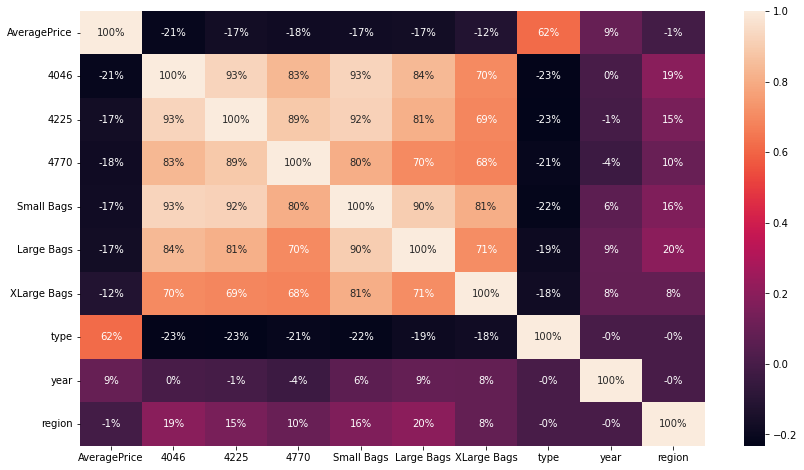

In [31]:
# let's Visualize it using heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()

From here we can Observe that 'region' is not at all correlated with 'type' and 'year' and just 1% that too negatively correlated with AveragePrice.

So while we predict for region, as an 'region' as label, we can drop 'type', 'year' and 'AveragePrice from the feature columns.

Similarly when we predict for AveragePrice as a label, we can drop 'region' column for model building.

Now let's come back to our current dataset, we can still observe some correalation between 4046 and 4225 and small bags,

Let's do some more plotting to get clear idea.

<AxesSubplot:xlabel='4046', ylabel='4225'>

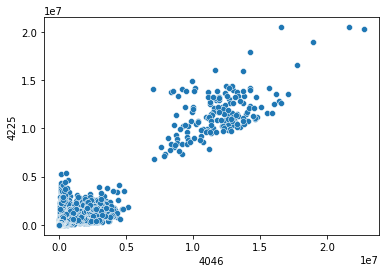

In [32]:
# relation between 4046 and 4225
sns.scatterplot(df['4046'],df['4225'])

We can see that PLU 4046 and PLU 4225 are sold more frequently togather. But we need to reconsider it as they both are two different avocado PLU.

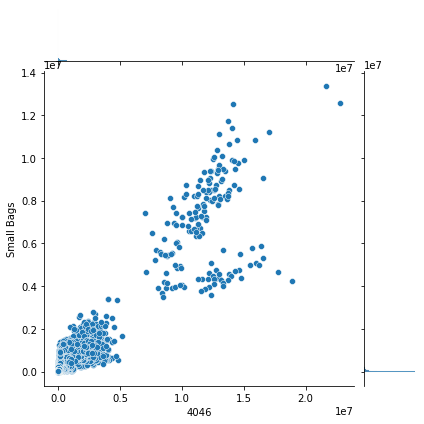

In [37]:
# relation between 4046 and small bags
sns.jointplot(df['4046'], df['Small Bags'])

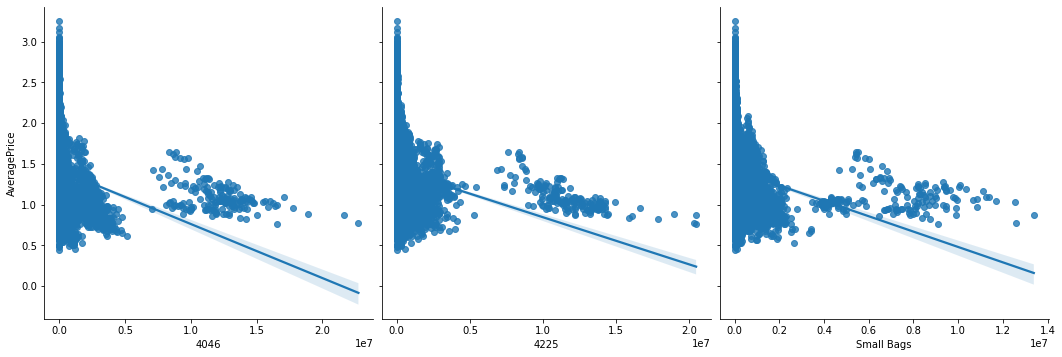

In [35]:
sns.pairplot(df, x_vars=['4046', '4225', 'Small Bags'], y_vars='AveragePrice', size=5, aspect=1, kind='reg')

We can clearly see strong correlation between data, We will check for Multicollinearity down the line. Before that let's see how our data looks like visually So to check for skewness and Outliers.

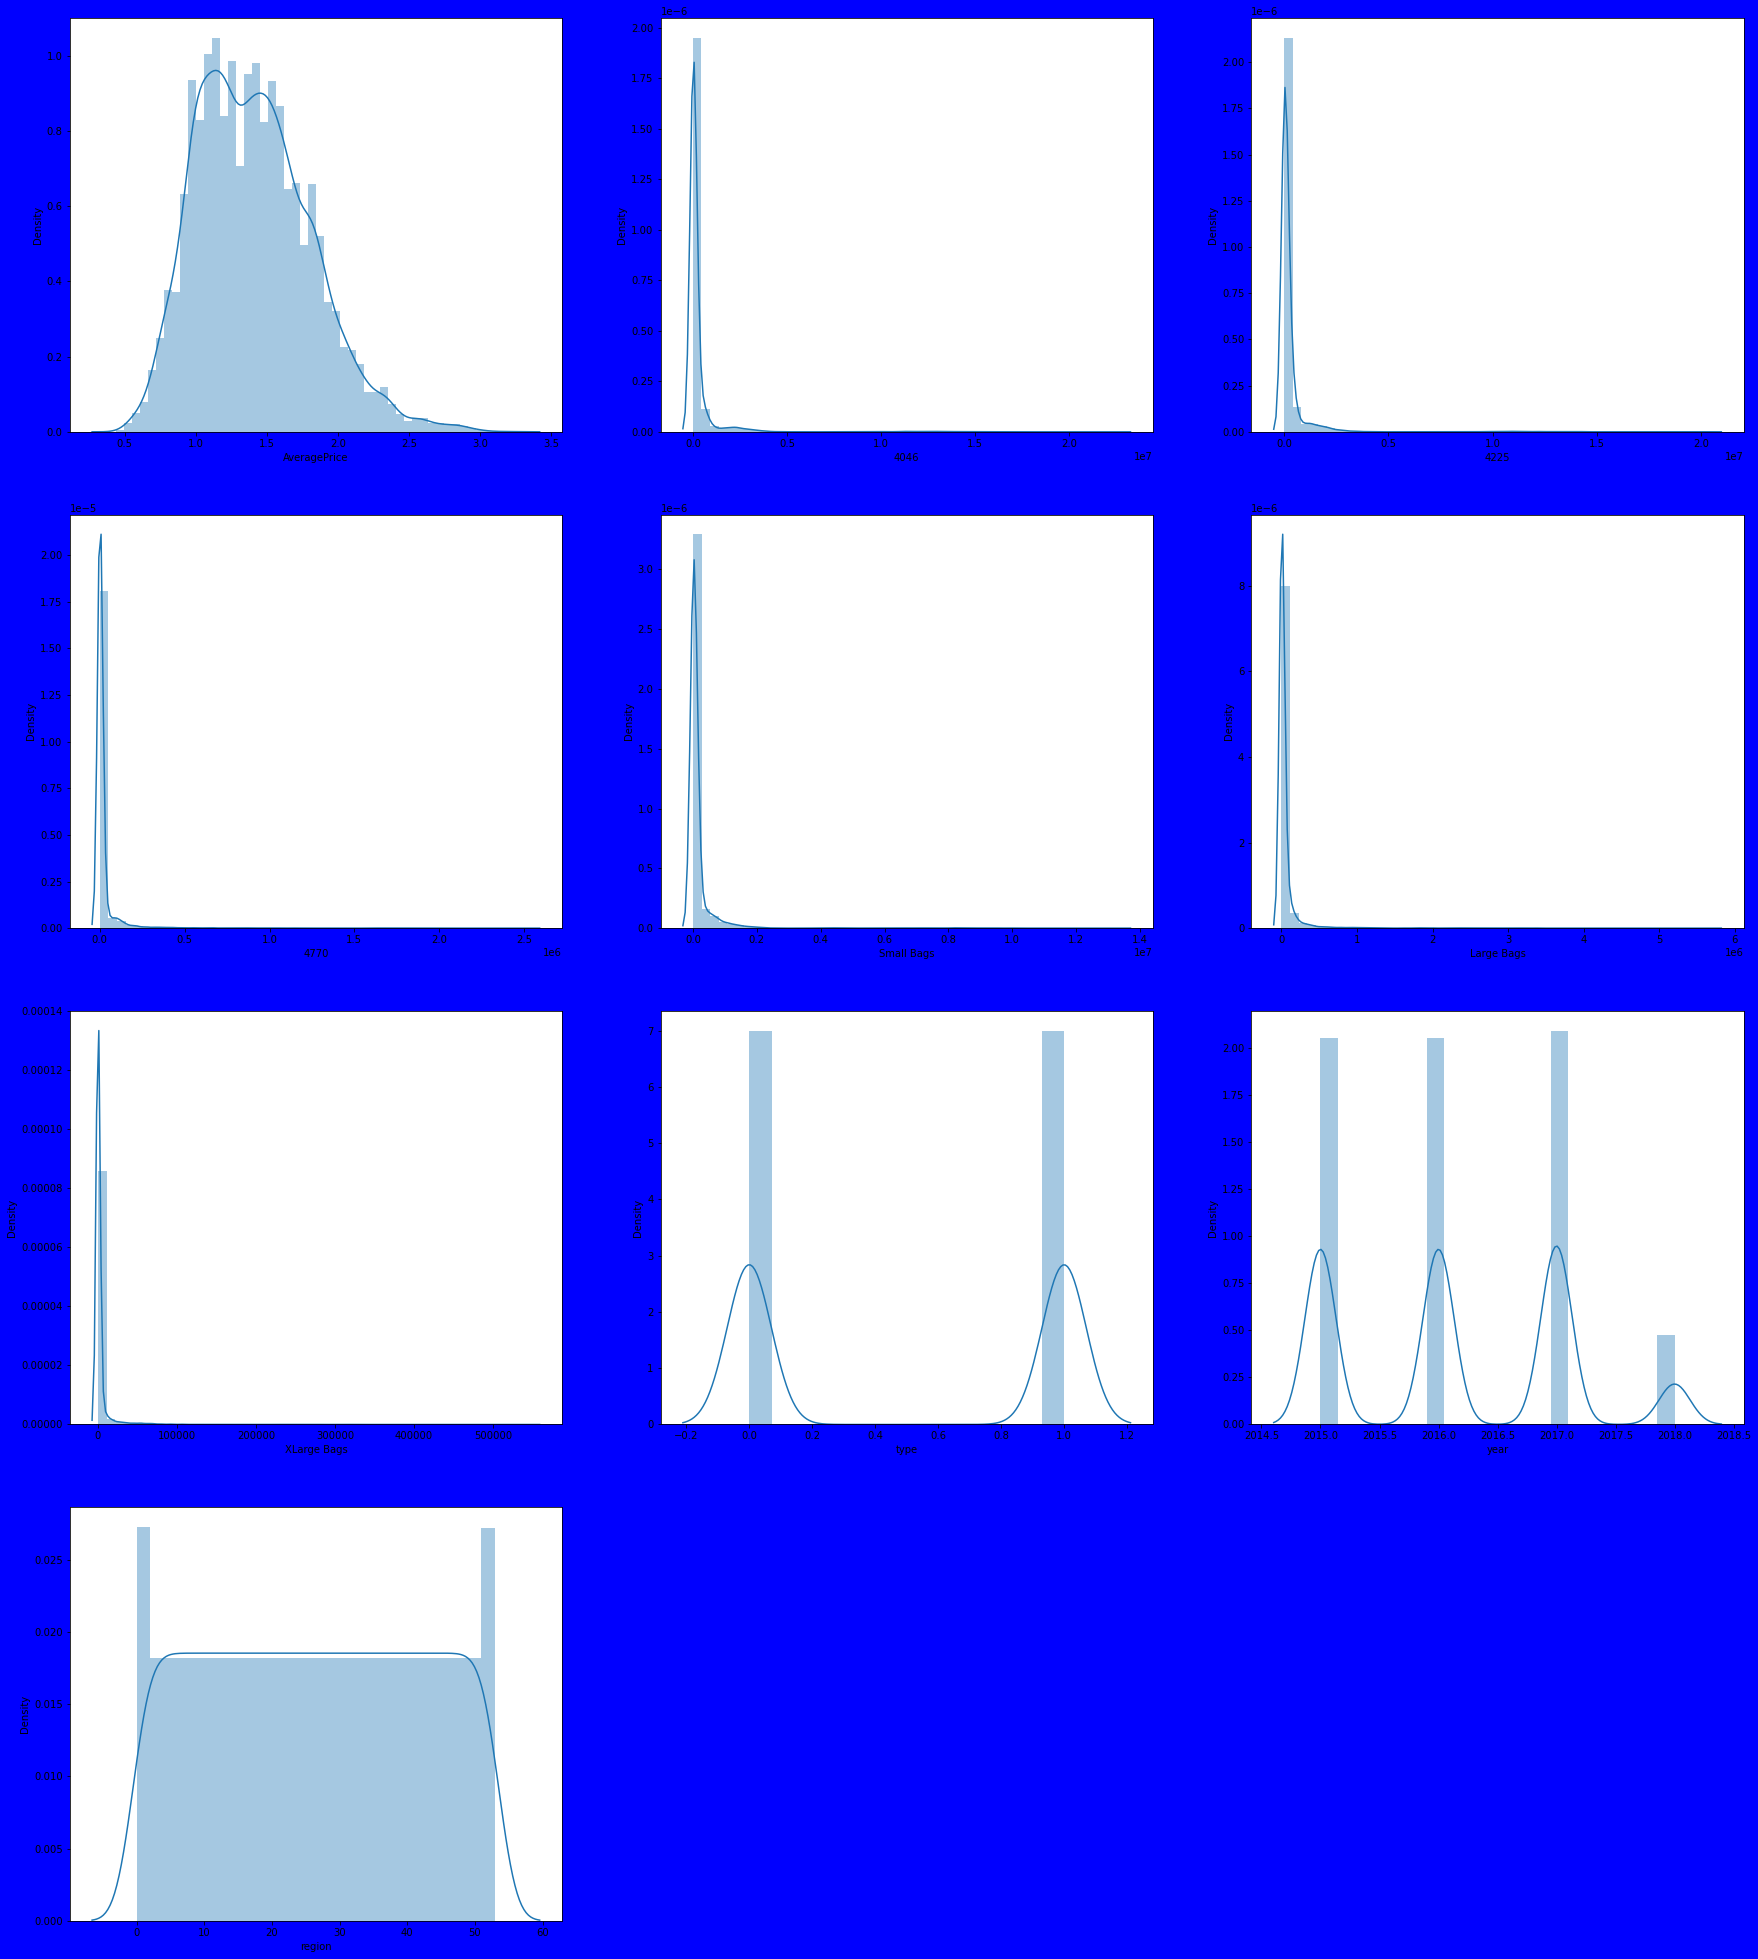

In [42]:
# let's see how data is distributed among each column.
plt.figure(figsize=(30,35), facecolor='blue')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
    plotnumber+=1
plt.show()

We can observe that there is skewness present in some of the columns of our data set.There are some outliers in the feature columns as well. Let's check for them and transform our dataset with no or less skewed data before moving towards Model Building phase.

# Skewness and Outlier check

In [43]:
# Let's chcek for Skewness in data
df.skew()

AveragePrice     0.580303
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

We can see that out dataset is highly skewed, So, lets use Power Transformer to remove the skewness from our data. In power Transformer the method we will use will be 'yeo-johnson'

In [52]:
from sklearn.preprocessing import PowerTransformer
pwrTrans=PowerTransformer(method='yeo-johnson')  

In [54]:
features=['4046','4225','4770','Small Bags', 'Large Bags','XLarge Bags']
df[features]=pwrTrans.fit_transform(df[features].values)


We will take threshold value for skewness as +/- 0.25 , so we will not perform transformation on them. 
We perform Skewness and Ouliers only on continuous features, that's why We left 'AveragePrice' in power transform.  
Data left untransformed are 'AveragePrice', 'type', 'year' and 'region'.

In [56]:
df.skew()

AveragePrice    0.580303
4046           -0.022679
4225           -0.017740
4770            0.032184
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.215339
region          0.000030
dtype: float64

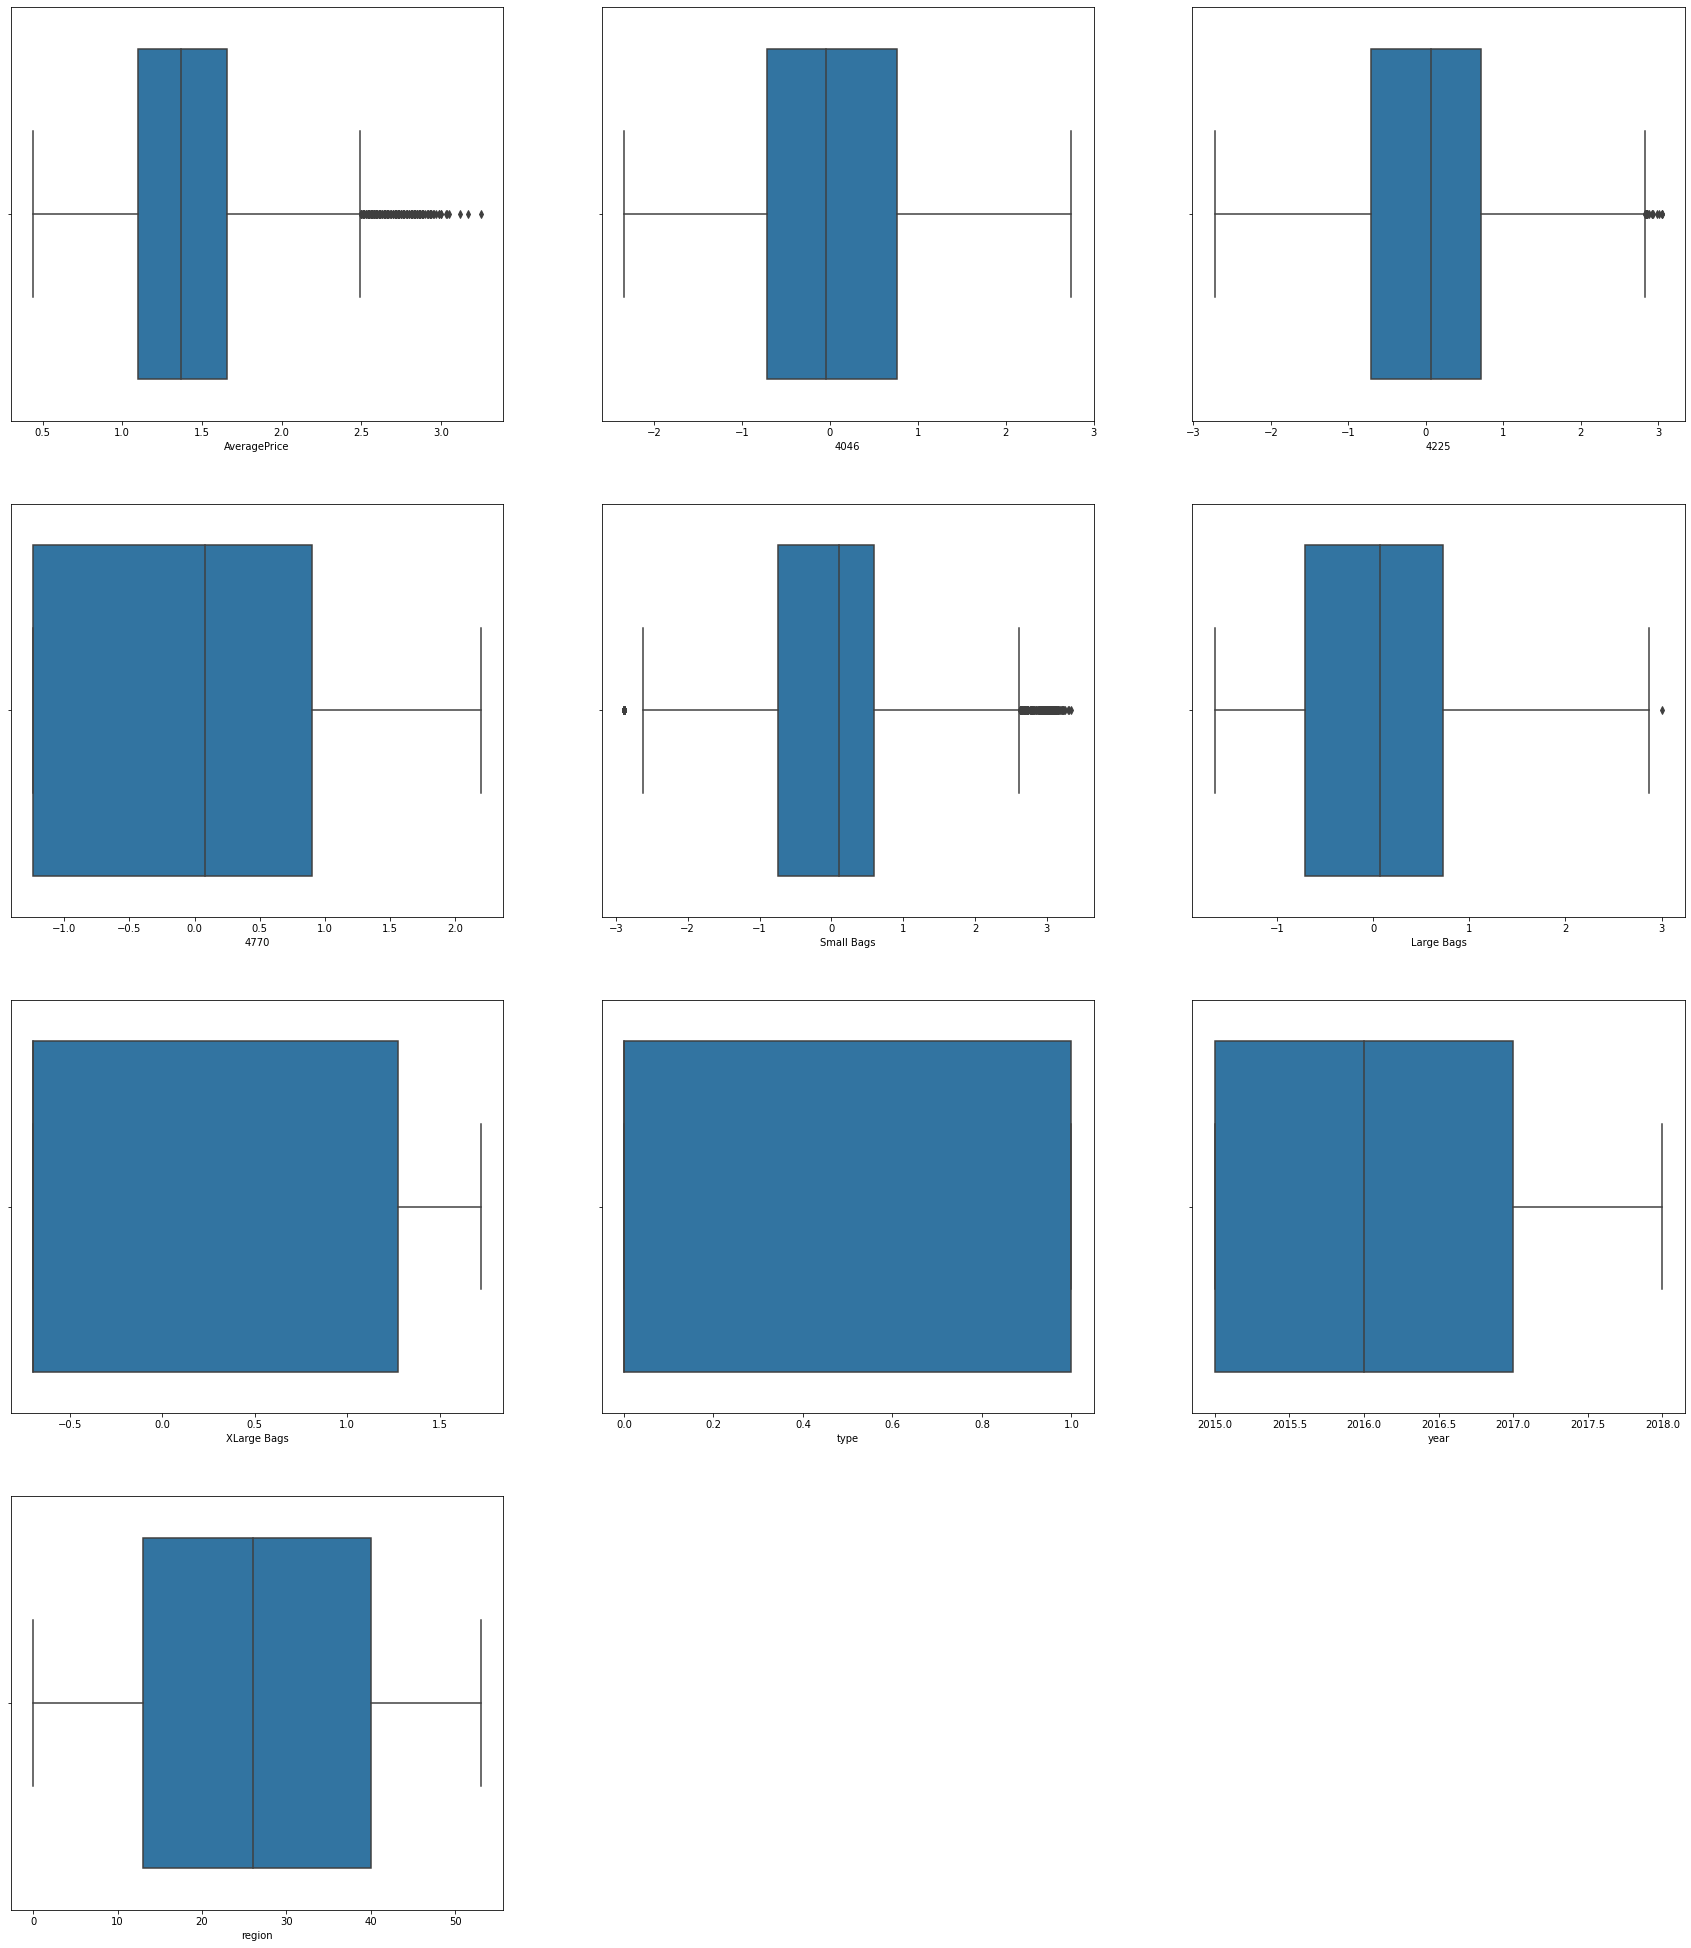

In [182]:
# Let's visualise outliers now. we are using boxplot as it gives us some insight about outliers in our datase.
plt.figure(figsize=(30,35), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
    plotnumber+=1
plt.show()


We can see some outlier, let's make sure about them and then remove them using Z-score method.

In [57]:
# for Outliers Dection and removal we will use Z- Score Method
from scipy import stats
df_out=df.copy()
z= np.abs(stats.zscore(df_out))
threshold = 3
print(np.where(z>3))

(array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
        5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
        5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
        8319,  8322,  8344,  8345,  8346,  8347,  8348,  8349,  8350,
        8351,  8352,  8353,  8354,  8355,  8356,  8357,  8358,  8359,
        8360,  8361,  8362,  8363,  8364,  8365,  8366,  8366,  8367,
        8368,  8369,  8370,  8371,  9090,  9091,  9092,  9093,  9094,
        9095,  9096,  9097,  9097,  9097,  9098,  9099,  9100,  9101,
       11320, 11321, 11323, 11324, 11325, 11326, 11327, 11328, 11329,
       11330, 11331, 11332, 12821, 12823, 13033, 13035, 13037, 13038,
       13395, 13657, 13661, 14019, 14020, 14073, 14074, 14119, 14120,
       14121, 14122, 14123, 14124, 14125, 14126, 14128, 14129, 14177,
       14385, 14699, 14701, 14702, 14807, 14911, 14912, 14913, 14914,
       14915, 14916, 14917, 14918, 14919, 15124, 15125, 15127, 15128,
       15129, 15130

In [58]:
df_out= df_out[(z<3).all(axis=1)]
df_out.shape

(18050, 10)

In [59]:
df_out.skew()

AveragePrice    0.395167
4046           -0.066922
4225           -0.079060
4770            0.015375
Small Bags     -0.078012
Large Bags     -0.123981
XLarge Bags     0.797271
type            0.007314
year            0.226530
region          0.009948
dtype: float64

We still see some degree of skewness in XLarge bags may be cause it has alot of valid zero values. As of now data looks good, let's proceed with this data.

# Scaling the data
 
 To scale the data we will use StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Preparing two dataset each for Regression and Classification Model


For Regression Model our label will be 'AveragePrice', in that dataset we will drop 'region' as they were hardly 1% correlated that too negative so.


For classification Model our label will be 'region' and from features we will drop 'type', 'year' and 'AveragePrice' from the dataset, as they were not correlated to region.

In [61]:
# from here let's divide our model into two category.
# dataset 1: data_avg is the data set for Average Price i.e our regression model
# dataset 2: data_region is the dataset for Region label i.e our classification Problem

data_avg= df_out[['AveragePrice', '4046', '4225','4770','Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year']]

data_region= df_out[['region', '4046','4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags']]

In [62]:
# let's have a look at the dataset
data_avg.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,-0.658619,0.307313,-0.247250,-0.340627,-0.773351,-0.699849,0,2015
1,1.35,-0.776870,0.231647,-0.201041,-0.306425,-0.763435,-0.699849,0,2015
2,0.93,-0.731947,0.579503,-0.007072,-0.366303,-0.750820,-0.699849,0,2015
3,1.08,-0.634200,0.415100,-0.148322,-0.496853,-0.691865,-0.699849,0,2015
4,1.28,-0.685293,0.224806,-0.137918,-0.477201,-0.600975,-0.699849,0,2015


In [63]:
data_region.head()

,region,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,0,-0.658619,0.307313,-0.247250,-0.340627,-0.773351,-0.699849
1,0,-0.776870,0.231647,-0.201041,-0.306425,-0.763435,-0.699849
2,0,-0.731947,0.579503,-0.007072,-0.366303,-0.750820,-0.699849
3,0,-0.634200,0.415100,-0.148322,-0.496853,-0.691865,-0.699849
4,0,-0.685293,0.224806,-0.137918,-0.477201,-0.600975,-0.699849


# Let's start with Regression Problem

In [64]:
# separating data into features and label
X_avg=data_avg.drop('AveragePrice', axis=1)
y_avg= data_avg.AveragePrice

In [65]:
# scaling the features using StandardScaler

scalar= StandardScaler()
X_scaled=scalar.fit_transform(X_avg)

In [66]:
#finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/1-R2): here R2=actual-predicted
#this method help us to identify multicollinearity.

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif=pd.DataFrame()
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X_avg.columns

#let's check the values
vif

,vif,Features
0,3.689588,4046
1,4.297795,4225
2,4.180994,4770
3,4.116644,Small Bags
4,1.962949,Large Bags
5,2.110086,XLarge Bags
6,3.359176,type
7,1.291503,year


Since the value is under 5, we can say that multicollinearity is not present in our data, and we are safe to proceed ahead with Model Building. 

In [69]:
# Model Building

# Since it is a regression problem we can start with Linear Regression

# importing libraries and metrics
 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [94]:
# Dividing data into train and test, we are taking test size of 20%
x_train, x_test,y_train,y_test= train_test_split(X_scaled, y_avg, test_size=0.20, random_state=50)

# ML Model
LR= LinearRegression()

#fit
LR.fit(x_train,y_train)

#predict
y_pred= LR.predict(x_test)
pred=LR.predict(x_train)

print("--------- Train score---------")
LR_train_MAE= round(mean_absolute_error(y_train, pred), 2)
LR_train_MSE= round(mean_squared_error(y_train, pred), 2)
LR_train_R2= round(r2_score(y_train, pred), 4)


print(f" Mean Absolute Error : {LR_train_MAE}\n")
print(f" Mean Squared Error : {LR_train_MSE}\n")
print(f" R^2 Score : {LR_train_R2}\n")


#score variables
LR_MAE= round(mean_absolute_error(y_test, y_pred), 2)
LR_MSE= round(mean_squared_error(y_test, y_pred), 2)
LR_R2= round(r2_score(y_test, y_pred), 4)

print("---------------Test Score-------------")
print(f" Mean Absolute Error : {LR_MAE}\n")
print(f" Mean Squared Error : {LR_MSE}\n")
print(f" R^2 Score : {LR_R2}\n")


--------- Train score---------
 Mean Absolute Error : 0.22

 Mean Squared Error : 0.08

 R^2 Score : 0.4789

---------------Test Score-------------
 Mean Absolute Error : 0.22

 Mean Squared Error : 0.08

 R^2 Score : 0.4864



In [95]:
# cross validation
from sklearn.model_selection import cross_val_score
LR= LinearRegression()
scores= cross_val_score(LR, x_train, y_train, scoring='r2', cv=10)
LR_CS=scores.mean()
print("Cross validation score is : ", LR_CS)

Cross validation score is :  0.4775170169819235


# Ensemble technique


In [92]:
from sklearn.ensemble import RandomForestRegressor

#Model
RFR= RandomForestRegressor()

#fit 
RFR.fit(x_train, y_train)

#predict
y_pred=RFR.predict(x_test)
pred=RFR.predict(x_train)

#score variables
print("--------- Train score---------")
RF_train_MAE= round(mean_absolute_error(y_train, pred), 2)
RF_train_MSE= round(mean_squared_error(y_train, pred), 2)
RF_train_R2= round(r2_score(y_train, pred), 4)


print(f" Mean Absolute Error : {RF_train_MAE}\n")
print(f" Mean Squared Error : {RF_train_MSE}\n")
print(f" R^2 Score : {RF_train_R2}\n")

print("--------- Test score---------")
RFR_MAE= round(mean_absolute_error(y_test, y_pred), 2)
RFR_MSE= round(mean_squared_error(y_test, y_pred), 2)
RFR_R2= round(r2_score(y_test, y_pred), 4)


print(f" Mean Absolute Error : {RFR_MAE}\n")
print(f" Mean Squared Error : {RFR_MSE}\n")
print(f" R^2 Score : {RFR_R2}\n")


--------- Train score---------
 Mean Absolute Error : 0.04

 Mean Squared Error : 0.0

 R^2 Score : 0.9741

--------- Test score---------
 Mean Absolute Error : 0.12

 Mean Squared Error : 0.03

 R^2 Score : 0.8184



In [93]:
# cross validation
RFR= RandomForestRegressor()
scores= cross_val_score(RFR, x_train, y_train, scoring='r2', cv=10)
RFR_CS=scores.mean()
print("Cross validation score is : ", RFR_CS)

Cross validation score is :  0.8098277852274138


In [98]:
# Summarizing each model

MAE=[LR_MAE,RFR_MAE]
MSE=[LR_MSE,RFR_MSE]
R2= [LR_R2,RFR_R2]
Cross_score= [LR_CS,RFR_CS]

Model= pd.DataFrame({
    'Models':['Linear Regression', 'Random Forest Regressor'],
    'MAE': MAE, 'MSE' :MSE, 'R^2' :R2, 'Cross Validation Score': Cross_score })

Model.sort_values(by ='MAE', ascending = True )

,Models,MAE,MSE,R^2,Cross Validation Score
1,Random Forest Regressor,0.12,0.03,0.8184,0.809828
0,Linear Regression,0.22,0.08,0.4864,0.477517


From the above observation we can say that our RandomForest Regressor algorithm performs better for this model to predict the AveragePrice of Avocado.

Now, Let's do some Hyper parameter tuning for RandomForest Regression model, in order to increase its efficiency.

For that we will use GridSearchCV.

In [103]:
# Hyper parameter Tuning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

RFR= RandomForestRegressor()

#determining what algorithm and parameter works better.
param_grid= {'n_estimators': [50,90,200],
            'criterion': ['squared_error', 'absolute_error'],
             'max_depth': [4,10,15],
             'min_samples_leaf':[2,6,8],
            'n_jobs': [1,4,10]}

rnd_srch=RandomizedSearchCV(RandomForestRegressor(), cv=5, param_distributions= param_grid)

rnd_srch.fit(x_train,y_train)


rnd_srch.best_estimator_

#grid_search=GridSearchCV(estimator=RFR, param_grid= param_grid, cv=5)

#grid_search.fit(x_train,y_train)

#grid_search.best_estimator_


RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=200,
                      n_jobs=1)

In [104]:
#GCV_pred= grid_search.best_estimator_.predict(x_test)   # predicting with best para meters

RCV_pred=rnd_srch.best_estimator_.predict(x_test)

print("Accuracy post tuning \n")
print(r2_score(y_test, RCV_pred))

Accuracy post tuning 

0.8087822376755874


As we are using RandomSearchCV to hypertune our parameters, as GridSearchCV may be the best practice but as our data size is so big, It takes hours and hours to run the script and come up with best parameters. So, in nut shell we perform RandomSearchCV to tune our model. 

Also as many times we run this code the value changes for best parameter, as it picks best suitable combinations for our Model.



As our Regression Model is trained, cross validate and Hyper tuned as well, Now it's time to save the best fit Model, which in our case  is RandomForestRegressor. So, let's save the model.

# Regression Model Saving

In [105]:
# Saving Best Performing Model
import joblib
joblib.dump(RFR, 'Avocado_project_predicting_AveragePrice.pkl')

['Avocado_project_predicting_AveragePrice.pkl']

# Let's start Building our second Model (Classification Model)

This model will be Multiclass Classification Model, where our Label will be 'region'

In [106]:
data_region.head()    # checking the data one more time


,region,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,0,-0.658619,0.307313,-0.247250,-0.340627,-0.773351,-0.699849
1,0,-0.776870,0.231647,-0.201041,-0.306425,-0.763435,-0.699849
2,0,-0.731947,0.579503,-0.007072,-0.366303,-0.750820,-0.699849
3,0,-0.634200,0.415100,-0.148322,-0.496853,-0.691865,-0.699849
4,0,-0.685293,0.224806,-0.137918,-0.477201,-0.600975,-0.699849


In [110]:
# Separating train and test data
X_region= data_region.drop('region', axis=1)
y_region=data_region.region

In [111]:
# let's scaled the data using StandardScaler
scaler=StandardScaler()
X_reg_scaled=scaler.fit_transform(X_region)

In [112]:
# Let's check for multicollinearity in this model as well. for that we will use VIF.

Vif=pd.DataFrame()
Vif["vif"]= [variance_inflation_factor(X_reg_scaled,i) for i in range(X_reg_scaled.shape[1])]
Vif["Features"]=X_region.columns

#let's check the values
Vif

,vif,Features
0,3.483342,4046
1,4.127263,4225
2,3.602488,4770
3,3.596309,Small Bags
4,1.842233,Large Bags
5,1.868140,XLarge Bags


The value for VIF is less than 5 in every column so, we can say that multicollinearity is not present in our dataset. It is safe to move ahead with model building.



As we can see that our model is classic example of MultiClass Classification, So, the algorithm we will be using are KNearestNeighbor Classifier and DecisonTree Classifier and may be gradientBoost classifier.

And the Metrics we will be using to predict the model accuracy will be f1 score and ROC AUC curve.
Let's start with Model Building.

# Model Building (Classification)

In [169]:
# Separating the train data and test data, using train test split, will take test size of 20%

X_train, X_test, Y_train, Y_test= train_test_split(X_reg_scaled, y_region, test_size=0.20, random_state=42)

# Model
KNN= KNeighborsClassifier()

#fit
KNN.fit(X_train,Y_train)

#predict
Y_Pred= KNN.predict(X_test)   #predicting for test data
Pred=KNN.predict(X_train)     # predicting for train data.
Y_Pred_prob=KNN.predict_proba(X_test) # test probability
Pred_prob= KNN.predict_proba(X_train)  # train probabilty

# scoring variables
KNN_score= (f1_score(Y_test, Y_Pred, average= None)).mean()          # f1_score for test data
KNN_train_score= (f1_score(Y_train,Pred, average= None)).mean()       # f1_score for train data
KNN_train_roc_auc= roc_auc_score(Y_train, Pred_prob, multi_class="ovr")  # roc auc for train data
KNN_roc_auc= roc_auc_score(Y_test, Y_Pred_prob, multi_class="ovr")
                            # we are using one vs rest method under multiclass parameter to calculate roc_auc_acore
print("\n--------------------Train Score---------------------\n")
print(f" f-1 Score for train data : {KNN_train_score}\n")
print(f" ROC_AUC score for train data : {KNN_train_roc_auc}\n")
print("\n---------------------Test Score-------------------\n")
print(f" f-1 Score for test data : {KNN_score}\n")
print(f" ROC_AUC score for test data: {KNN_roc_auc}\n")



--------------------Train Score---------------------

 f-1 Score for train data : 0.892990129415942

 ROC_AUC score for train data : 0.999114883829148


---------------------Test Score-------------------

 f-1 Score for test data : 0.8311630987130866

 ROC_AUC score for test data: 0.9737047648619069



In [180]:
# Cross Validation

from sklearn.model_selection import cross_val_score

# validating accuracy
KNN_scr= cross_val_score(KNN, X_reg_scaled, y_region,scoring='roc_auc_ovr', cv=10)
print("Cross Validation Score For KNN model : ", KNN_scr.mean())

Cross Validation Score For KNN model :  0.9270733130778366



The F1 Score for train and test data looks good, It seems like our Model is working well.


# Boosting 

In [172]:
# Model
from sklearn.ensemble import GradientBoostingClassifier

GBC= GradientBoostingClassifier()

#fit
GBC.fit(X_train, Y_train)

# predict
Y_Pred= GBC.predict(X_test)            # predicting for test data.
Pred=GBC.predict(X_train)             #predicting for train data

Y_Pred_prob= GBC.predict_proba(X_test)  #test probability
Pred_prob= GBC.predict_proba(X_train)    # train data probability

#score variables
GBC_score= (f1_score(Y_test, Y_Pred, average= None)).mean()
GBC_train_score= (f1_score(Y_train, Pred, average= None)).mean()
GBC_train_roc_auc= roc_auc_score(Y_train, Pred_prob, multi_class="ovr")
GBC_roc_auc=roc_auc_score(Y_test,Y_Pred_prob, multi_class="ovr")   
                           # we are using multiclass= "ovr" that means one over rest method

print("\n----------------------Train Score------------------")
print(f" f-1 Score for train data : {GBC_train_score}\n")
print(f"ROC_AUC score for train data : {GBC_train_roc_auc}\n")
print("\n ---------------------Test score---------------------")
print(f" f-1 Score for test data : {GBC_score}\n")
print(f" ROC_AUC scores for test data: {GBC_roc_auc}\n")




----------------------Train Score------------------
 f-1 Score for train data : 0.9624462148627098

ROC_AUC score for train data : 0.9997053114208769


 ---------------------Test score---------------------
 f-1 Score for test data : 0.7982560246935946

 ROC_AUC scores for test data: 0.9914161123615622



In [174]:
# Cross Validation

from sklearn.model_selection import cross_val_score

GBC_scr= cross_val_score(GBC, X_reg_scaled, y_region,scoring= 'roc_auc_ovr' ,cv=10)
print("Cross Validation Score For GradienBoost Classification model : ", GBC_scr.mean())

Cross Validation Score For GradienBoost Classification model :  0.9767599377450551


# Decision tree Classifier

In [167]:
from sklearn.tree  import DecisionTreeClassifier

# model
DTC= DecisionTreeClassifier()

#fit
DTC.fit(X_train, Y_train)

# predict
Y_Pred= DTC.predict(X_test)
Pred=DTC.predict(X_train)

Y_Pred_prob= DTC.predict_proba(X_test)
Pred_prob= DTC.predict_proba(X_train)
# scores variables
DTC_score= (f1_score(Y_test, Y_Pred, average= None)).mean()
DTC_train_score= (f1_score(Y_train, Pred, average= None)).mean()
DTC_roc_auc=roc_auc_score(Y_test,Y_Pred_prob, multi_class="ovr")   # for test data
DTC_train_roc_auc= roc_auc_score(Y_train,Pred_prob, multi_class="ovr") # for train data
print ("\n ---------------------------------Train Scores--------------------------\n")

print(f" f-1 Score for train data : {DTC_train_score}\n")
print(f" ROC_AUC Score for train data : {DTC_train_roc_auc}\n")

print("\n ------------------------------------Test Scores---------------------------\n")
print(f" f-1 Score for test data : {DTC_score}\n")
print(f" ROC_AUC SCORE for test data : {DTC_roc_auc}\n")



 ---------------------------------Train Scores--------------------------

 f-1 Score for train data : 1.0

 ROC_AUC Score for train data : 1.0


 ------------------------------------Test Scores---------------------------

 f-1 Score for test data : 0.763117241437839

 ROC_AUC SCORE for test data : 0.8797011298192979



In [176]:
# Cross validation
DTC_scr= cross_val_score(DTC, X_reg_scaled, y_region,scoring= 'roc_auc_ovr', cv=10)
print("Cross Validation Score For Decision Tree Classification model : ", DTC_scr.mean())

Cross Validation Score For Decision Tree Classification model :  0.8055727785976788


In [181]:
# Summarizing each of the Classification Model
F1_Score=[KNN_score, GBC_score, DTC_score]
ROC_AUC_SCORE=[KNN_roc_auc, GBC_roc_auc, DTC_roc_auc]
Cross_score= [KNN_scr.mean(),GBC_scr.mean(), DTC_scr.mean()]

Model= pd.DataFrame({
    'Models':['KNearestNeighbor Classifier', 'GradientBoosting Classifier', 'DecisionTree Classifier'],
    'F1 Score': F1_Score, 'ROC AUC Score' : ROC_AUC_SCORE,'Cross Validation Score': Cross_score })

Model.sort_values(by ='ROC AUC Score', ascending = False )


,Models,F1 Score,ROC AUC Score,Cross Validation Score
1,GradientBoosting Classifier,0.798256,0.991416,0.976760
0,KNearestNeighbor Classifier,0.831163,0.973705,0.927073
2,DecisionTree Classifier,0.763117,0.879701,0.805573


Here we are deciding our model on the basis of ROC AUC because roc_auc_score provides us with information about how well a model is performing its job of separating cases, in our case we have 54 classes in our Label and it helps us to separate each one from rest others. 

And we can Observe that GradientBoosting Classifier has highest roc_auc score and KNN has highest f1_score. And here our clases are pretty much balanced so we decided to go with HIGH ROC AUC score, i.e GradientBoosting Classifier.

Let's do hyper parameter tuning for our model then we will save it.

In [ ]:
# Hyper parameter tuning for GradientBoosting Classifier by using RandomisedSearchCV

# creating list of parameters

grid_param={ 'max_depth': range(5,11),
           'min_samples_split': range(2,8,2),
           'learning_rate': np.arange(0.1, 0.5),
           'loss' : ['log_loss', 'deviance', 'exponential']}

rnd_srch = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions= grid_param)
#fit
rnd_srch.fit(X_train,Y_train)
rnd_srch.best_params_    # finding best parameters



In [188]:
#creaing the model with best parameters
GBC = GradientBoostingClassifier(learning_rate= 0.1,loss='deviance' ,max_depth= 4, min_samples_split= 2)

# fit
GBC.fit(X_train, Y_train)

#predict
RCV_pred= GBC.predict(X_test)    # predict the test score

RCV_prob=GBC.predict_proba(X_test)   # predicting the probability

#score variables
GBC_score_r= (f1_score(Y_test, RCV_pred, average= None)).mean()

GBC_roc_auc_r=roc_auc_score(Y_test,RCV_prob, multi_class="ovr")   
                           # we are using multiclass= "ovr" that means one over rest method

print("\n -------Post Tunning Score-----------\n ")
print(f" f-1 Score for test data : {GBC_score_r}\n")
print(f" ROC_AUC scores for test data: {GBC_roc_auc_r}\n")




 -------Post Tunning Score-----------
 
 f-1 Score for test data : 0.8030203633191704

 ROC_AUC scores for test data: 0.9920796130765986



As our Final Classification Model 'GradientBoosting Classifier' is hyper parameter tuned as well. We are ready to save our Model. For that we will use 

# Saving the Classification Model.

In [189]:
# Pickeling of file or serialization of a file.

import joblib
joblib.dump(GBC, "AvocadoProject_Predicting_region.pkl")

['AvocadoProject_Predicting_region.pkl']